<a href="https://colab.research.google.com/github/yugonsan/pytorch_practice/blob/main/%E7%AC%AC10%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 必要ライブラリの導入

!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [2]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [3]:
# PyTorch関連ライブラリのインポート

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets

In [4]:
# warning表示off
import warnings
warnings.simplefilter('ignore')

# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの表示桁数設定
np.set_printoptions(suppress=True, precision=5)

In [5]:
# GPUチェック

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [10]:
# 分類先クラスの名称リスト
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck', 'truck')

# 分類先クラス数　今回は10になる
# setは集合を扱うメソッドみたい、この場合は、重複をなくしてくれるみたい。
n_output = len(list(set(classes)))

# 結果確認
print(n_output)

10


- SGD（Stochastic Gradient Descent）勾配に一定の学習率をかけてパラメーターを修正していく方法。基本的な勾配降下法です。pytorchではoptim.SGDというクラスを利用する。
- Momentumとは、SGDが直近の勾配値しかパラメーター更新しないのに対して、過去の勾配値を記憶して、そのパラメーターを一定比率で減らしつつパラメター更新に利用します。optim.SGDを使って、momentumのパラメータ値を指定する
- Adam。複雑なので略。良いところどり.
  optimizer = optim.Adam(net.parameters()) 

- 機械学習の目的は学習に使ってない検証データに対する精度を良くすること
- 訓練データばかりに最適化してしまい、検証データに対する精度が上がらないあるいは返って悪くなる現象を指して過学習と呼びます。DLで最も避けるべき事態です。
- いくつかの過学習対策方法
  - ドロップアウト
  - batch nprmalization
  - data augmentation

### ドロップアウト
- NNを定義する際にドロップアウト関数の間に部品として追加します。ドロップアウト関数のインスタンス生成時に、ドロップアウト関数のインスタンス生成時にドロップアウト比率をパラメーターとして設定して起きます。
- 学習のたびに、設定したドロップアウト比率の分だけ、ドロップアウトの入力となる中間テンソルからランダムにドロップアウト関数の入力となる中間テンソルからランダムにドロップアウトの対象を選び、その要素を出力しなくなる（正確には出力値が0になる）

In [12]:
# ドロップアウトテスト用のダミーデータの生成
torch.manual_seed(123)
inputs = torch.randn(1, 10)
print(inputs)

tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
          0.3239, -0.1085]])


In [15]:
# ドロップアウト関数の定義
dropout = nn.Dropout(0.5)
# 訓練フェーズでの挙動
dropout.train()
print(dropout.training)
outputs = dropout(inputs)
print(outputs)
# 入力値全体の平均がドロップアウト前と変わらないようにするために、伝搬される方は倍になる
# 予測フェーズでの挙動
dropout.eval()
print(dropout.training)
outputs = dropout(inputs)
print(outputs)

True
tensor([[-0.2229,  0.2407, -0.7393, -0.4808, -0.0000,  0.4185, -0.0000, -0.0000,
          0.6478, -0.2170]])
False
tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
          0.3239, -0.1085]])


### Batch Normalization
- ミニバッチの単位で前のレイヤー関数の出力に対して正規化の処理をした後に、次のレイヤー関数に出力に対して正規化の処理をした後に、次のレイヤー関数に入力すると、学習効率が上がるとともに、過学習対策になることが発見された
- 畳み込み処理中は、nn.BatchNorm2dを、線形関数の直後はnn.BatchNorm1dを利用する
- インスタンス生成時には、nn.BatchNorm2dは入力データのチャンネル数、nn.BatchNorm1dの時は入力データの次元数



### Data Augmentation
- 学習前の入力データに加工を施すことで、結果的に学習データのバリュエーションを増やす方法
- モデルから見ると、繰り返しのたびに異なるデータパターンがやってくることにになるので、過学習が発生にしにくくなる
- 

In [16]:
# 共通関数のダウンロード
!git clone https://github.com/makaishi2/pythonlibs.git

# 共通関数のロード
from pythonlibs.torch_lib1 import *

# 共通関数の存在チェック
print(README)


Cloning into 'pythonlibs'...
remote: Enumerating objects: 108, done.
remote: Total 108 (delta 0), reused 0 (delta 0), pack-reused 108
Receiving objects: 100% (108/108), 21.11 MiB | 18.03 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Common Library for PyTorch
Author: M. Akaishi


In [17]:
# Transformsの定義

transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5)
])

In [18]:
# データ取得用関数 Dataset

data_root = './data'

train_set = datasets.CIFAR10(
    root = data_root, train = True, 
    download = True, transform = transform)

# 検証データの取得
test_set = datasets.CIFAR10(
    root = data_root, train = False, 
    download = True, transform = transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [19]:
# ミニバッチのサイズ指定
batch_size = 100

# 訓練用データローダー
# 訓練用なので、シャッフルをかける
train_loader = DataLoader(train_set, 
    batch_size = batch_size, shuffle = True)

# 検証用データローダー
# 検証時にシャッフルは不要
test_loader = DataLoader(test_set,  
    batch_size = batch_size, shuffle = False)

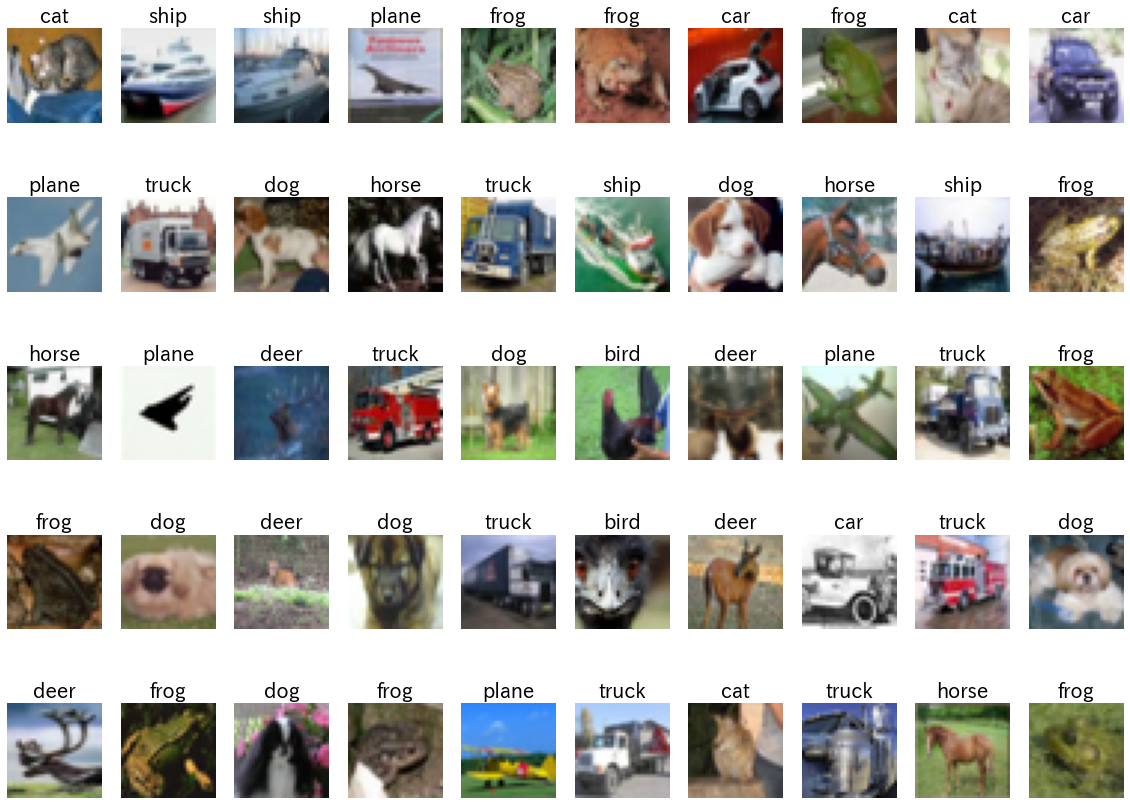

In [20]:
# 最初の50個の表示
show_images_labels(test_loader, classes, None, None)

In [21]:
class CNN_v2(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, num_classes)

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool,
            self.conv3,
            self.relu,
            self.conv4,
            self.relu,
            self.maxpool,
            self.conv5,
            self.relu,
            self.conv6,
            self.relu,
            self.maxpool,
            )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

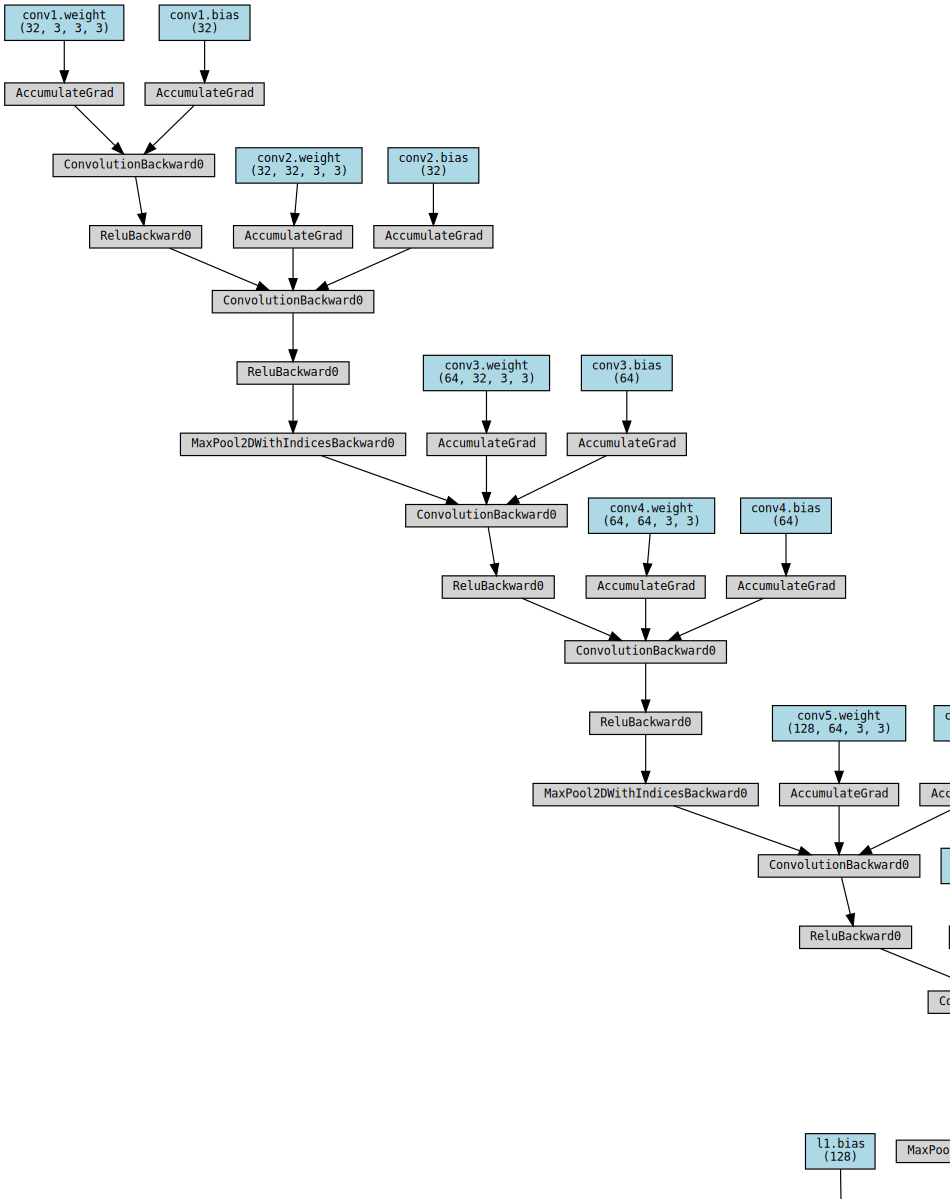

In [22]:
# 損失関数のグラフ表示
net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
loss = eval_loss(test_loader, device, net, criterion)
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [23]:
# 乱数の固定化
torch_seed()

# モデルインスタンス生成
lr = 0.01
net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
history = np.zeros((0, 5))

In [ ]:
# 学習

num_epochs = 50
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/50], loss: 0.02303 acc: 0.10000 val_loss: 0.02303, val_acc: 0.10000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/50], loss: 0.02303 acc: 0.10000 val_loss: 0.02303, val_acc: 0.10000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/50], loss: 0.02302 acc: 0.10000 val_loss: 0.02302, val_acc: 0.10000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/50], loss: 0.02302 acc: 0.10840 val_loss: 0.02302, val_acc: 0.10170


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/50], loss: 0.02302 acc: 0.13026 val_loss: 0.02302, val_acc: 0.17470


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/50], loss: 0.02301 acc: 0.16760 val_loss: 0.02300, val_acc: 0.19090


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/50], loss: 0.02298 acc: 0.18558 val_loss: 0.02294, val_acc: 0.21870


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/50], loss: 0.02245 acc: 0.21924 val_loss: 0.02096, val_acc: 0.23850


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/50], loss: 0.02016 acc: 0.26154 val_loss: 0.01945, val_acc: 0.29330


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/50], loss: 0.01906 acc: 0.31290 val_loss: 0.01902, val_acc: 0.31030


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/50], loss: 0.01796 acc: 0.35110 val_loss: 0.01700, val_acc: 0.38890


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/50], loss: 0.01697 acc: 0.38360 val_loss: 0.01627, val_acc: 0.41270


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/50], loss: 0.01628 acc: 0.40622 val_loss: 0.01560, val_acc: 0.42770


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/50], loss: 0.01574 acc: 0.42172 val_loss: 0.01607, val_acc: 0.41850


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/50], loss: 0.01531 acc: 0.43800 val_loss: 0.01510, val_acc: 0.44320


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/50], loss: 0.01482 acc: 0.45852 val_loss: 0.01438, val_acc: 0.47380


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/50], loss: 0.01442 acc: 0.47418 val_loss: 0.01400, val_acc: 0.48780


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/50], loss: 0.01399 acc: 0.49346 val_loss: 0.01429, val_acc: 0.48150


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/50], loss: 0.01355 acc: 0.51242 val_loss: 0.01335, val_acc: 0.51620


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/50], loss: 0.01311 acc: 0.53206 val_loss: 0.01295, val_acc: 0.53180


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [21/50], loss: 0.01259 acc: 0.54896 val_loss: 0.01233, val_acc: 0.55590


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [22/50], loss: 0.01218 acc: 0.56768 val_loss: 0.01215, val_acc: 0.56000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [23/50], loss: 0.01175 acc: 0.58164 val_loss: 0.01199, val_acc: 0.57290


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [24/50], loss: 0.01142 acc: 0.59544 val_loss: 0.01153, val_acc: 0.58770


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [25/50], loss: 0.01098 acc: 0.61016 val_loss: 0.01128, val_acc: 0.59610


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [26/50], loss: 0.01062 acc: 0.62580 val_loss: 0.01094, val_acc: 0.61460


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [27/50], loss: 0.01024 acc: 0.64076 val_loss: 0.01116, val_acc: 0.60650


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [28/50], loss: 0.00987 acc: 0.65210 val_loss: 0.01060, val_acc: 0.62980


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [29/50], loss: 0.00957 acc: 0.66480 val_loss: 0.01006, val_acc: 0.64770


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [30/50], loss: 0.00918 acc: 0.67926 val_loss: 0.00981, val_acc: 0.65070


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [31/50], loss: 0.00887 acc: 0.68994 val_loss: 0.00979, val_acc: 0.65940


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [32/50], loss: 0.00859 acc: 0.69908 val_loss: 0.00944, val_acc: 0.67180


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [33/50], loss: 0.00825 acc: 0.71202 val_loss: 0.00990, val_acc: 0.65680


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [34/50], loss: 0.00796 acc: 0.72328 val_loss: 0.00922, val_acc: 0.68190


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [35/50], loss: 0.00764 acc: 0.73456 val_loss: 0.00943, val_acc: 0.67410


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [36/50], loss: 0.00736 acc: 0.74232 val_loss: 0.00925, val_acc: 0.68020


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [37/50], loss: 0.00707 acc: 0.75244 val_loss: 0.00937, val_acc: 0.68480


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [38/50], loss: 0.00675 acc: 0.76330 val_loss: 0.00921, val_acc: 0.68830


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [39/50], loss: 0.00643 acc: 0.77572 val_loss: 0.00928, val_acc: 0.69710


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [40/50], loss: 0.00619 acc: 0.78436 val_loss: 0.00911, val_acc: 0.69470


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [41/50], loss: 0.00588 acc: 0.79604 val_loss: 0.00966, val_acc: 0.68880


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [42/50], loss: 0.00559 acc: 0.80598 val_loss: 0.00949, val_acc: 0.69850


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [43/50], loss: 0.00527 acc: 0.81562 val_loss: 0.00937, val_acc: 0.69690


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [44/50], loss: 0.00497 acc: 0.82730 val_loss: 0.00943, val_acc: 0.70080


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [45/50], loss: 0.00472 acc: 0.83388 val_loss: 0.01048, val_acc: 0.67740


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [46/50], loss: 0.00439 acc: 0.84602 val_loss: 0.01045, val_acc: 0.68920


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [47/50], loss: 0.00406 acc: 0.85644 val_loss: 0.01001, val_acc: 0.69700


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [48/50], loss: 0.00377 acc: 0.86782 val_loss: 0.01021, val_acc: 0.70510


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [49/50], loss: 0.00350 acc: 0.87586 val_loss: 0.01077, val_acc: 0.69590


  0%|          | 0/500 [00:00<?, ?it/s]

In [1]:
evaluate_history(history)

NameError: ignored

ggg